Load the data from “cereal.csv” and plot histograms of sugar and vitamin
content across different cereals

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns

Data PreProcessing

In [77]:
df = pd.read_csv('datasets/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<Axes: ylabel='Frequency'>

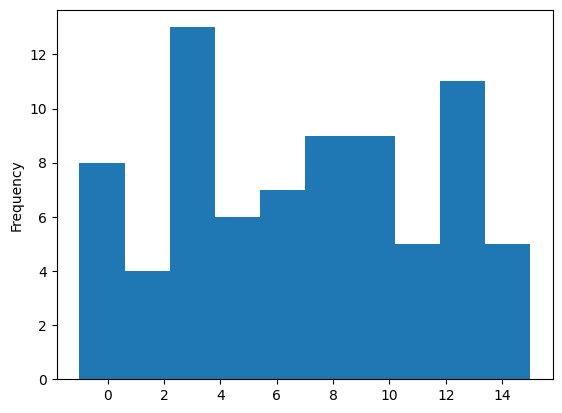

In [78]:
df['sugars'].plot.hist()

<Axes: ylabel='Frequency'>

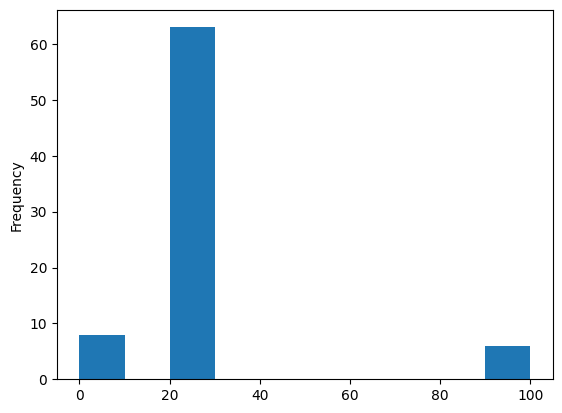

In [79]:
df['vitamins'].plot.hist()

The names of the manufacturers are coded using alphabets, create a new
column with their full name using the below mapping

In [80]:
manufact_dict = {'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills',
'P' :'Post' ,
'A':'American Home Foods Products'
}

df['mfr_name'] = df['mfr'].apply(lambda x: manufact_dict[x])
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_name
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559,General Mills


In [81]:
mfr_cereals = df.groupby('mfr_name')['name'].count()

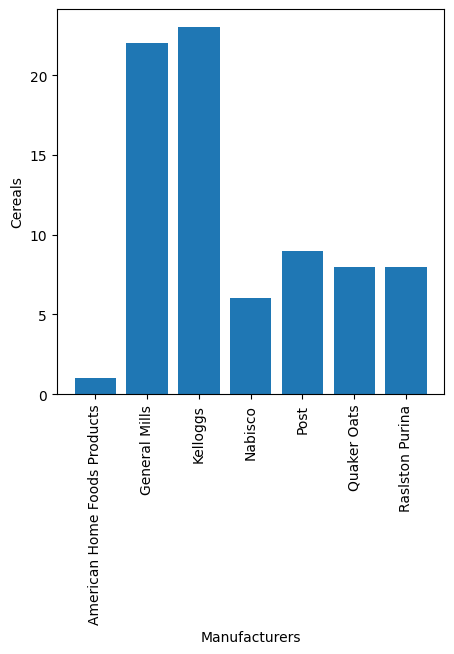

In [82]:
plt.figure(figsize=(5, 5))
plt.xlabel("Manufacturers")
plt.ylabel("Cereals")
plt.xticks(rotation=90)
plt.bar(mfr_cereals.keys(), mfr_cereals.values)
plt.show()

ML Start

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> --> Simple Linear Regression

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub>  + b<sub>2</sub>X<sub>2</sub> + .... + b<sub>n</sub>X<sub>n</sub> --> Multiple Linear Regression

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>1</sub><sup>2</sup> + .... + b<sub>n</sub>X<sub>1</sub><sup>n</sup> --> Polynomial Linear Regression

Minimize --> Ordinary Leat Squares/Sum of Squared Errors = Σ(y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup> (actual - predicted)

In [83]:
# independent and Dependent Variables

X = df.drop(['name', 'mfr', 'type', 'mfr_name', 'rating'], axis=1).values
y = df['rating'].values

In [84]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [85]:
# Train the Model on Traing Set (Multiple Linear Regression - More than one independant variable)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predict output on Test Set
y_pred = linear_regressor.predict(X_test)

In [87]:
# Calculate Metrics

from sklearn import metrics
import math

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

MSE:  1.1452265271197744e-13
RMSE:  3.3841195710550396e-07
MAE:  2.922058056853416e-07
R Squared:  0.999999999999999


In [88]:
print("b0 : ", linear_regressor.intercept_)

cols = df.drop(['name', 'mfr', 'type', 'mfr_name', 'rating'], axis=1).columns
cdf = pd.DataFrame(data=linear_regressor.coef_, index=cols, columns=['Coeff'], dtype=float, copy=False)
print("\n b1, b2, .., bn \n", cdf)

b0 :  54.92718423606894

 b1, b2, .., bn 
                  Coeff
calories -2.227242e-01
protein   3.273174e+00
fat      -1.691408e+00
sodium   -5.449270e-02
fiber     3.443480e+00
carbo     1.092451e+00
sugars   -7.248952e-01
potass   -3.399335e-02
vitamins -5.121197e-02
shelf    -7.464235e-08
weight    3.088677e-07
cups      1.103866e-07


Statistical SIgnificance

In [89]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.349e+16
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        23:39:51   Log-Likelihood:                 1053.2
No. Observations:                  77   AIC:                            -2080.
Df Residuals:                      64   BIC:                            -2050.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9272   3.63e-07   1.51e+08      0.0